In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Arial"

In [2]:
#https://github.com/matplotlib/matplotlib/issues/11155#issuecomment-385939618
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [3]:
data = pd.read_csv(os.path.join("JV297_phos_localized_sit4_normalized.txt"), sep="\t")

In [4]:
data_v = data[["Protein Id", "gene_symbol", "site_id", "sit4/WT fold change", "sit4/WT p-value"]]

In [5]:
data_v = data_v.dropna(axis=0)

In [6]:
data_v.columns = ["Protein Id", "gene_symbol", "site_id", 'fold change', 'p-value']

In [7]:
data_v['log$_2$(Fold Change)'] = np.log2(data_v['fold change'])
data_v['-log$_1$$_0$(p-value)'] = -1 * np.log10(data_v['p-value'])

In [8]:
data_v["merged_name"] = data_v["gene_symbol"] + "_" + data_v["site_id"].astype(int).astype(str)

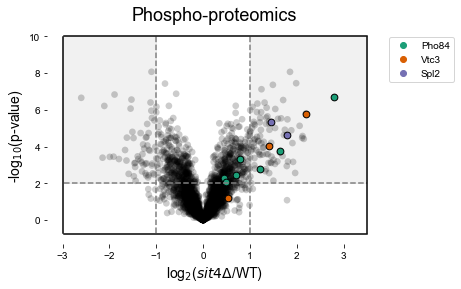

In [18]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data_v['log$_2$(Fold Change)'].values, data_v['-log$_1$$_0$(p-value)'].values,
    c='black',
    edgecolors='none',
    s=45,
    alpha=0.2,
    ax=ax)

#PHO84
data_v1 = data_v.loc[data_v["gene_symbol"] == "PHO84"]
mscatter(
    data_v1['log$_2$(Fold Change)'].values, data_v1['-log$_1$$_0$(p-value)'].values,
    c='#1b9e77',
    edgecolors='black',
    s=45,
    alpha=1,
    ax=ax)

#VTC3
data_v2 = data_v.loc[data_v["gene_symbol"] == "VTC3"]
mscatter(
    data_v2['log$_2$(Fold Change)'].values, data_v2['-log$_1$$_0$(p-value)'].values,
    c='#d95f02',
    edgecolors='black',
    s=45,
    alpha=1,
    ax=ax)

#SPL2
data_v3 = data_v.loc[data_v["gene_symbol"] == "SPL2"]
mscatter(
    data_v3['log$_2$(Fold Change)'].values, data_v3['-log$_1$$_0$(p-value)'].values,
    c='#7570b3',
    edgecolors='black',
    s=45,
    alpha=1,
    ax=ax)

ax.set_xlabel('log$_2$($\it{sit4}$$\Delta$/WT)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(p-value)', fontsize=14)
ax.set_title('Phospho-proteomics', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 2.5, 8, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-3,2), 2, 8, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-3, ymin=0.048, ymax=0.953, ls='-', color="black")
ax.axhline(10, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(3.5, ymin=0.048, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Label legends
simp_sample_hex = {
    'PHO84':   '#1b9e77', 
    'VTC3': '#d95f02',
    'SPL2': '#7570b3'
}

g = lambda m,c: plt.plot([],[], marker='o', color=c, ls="none")[0]
handles_g = [g("s", list(simp_sample_hex.values())[i]) for i in range(len(list(simp_sample_hex.values())))]
plt.legend(handles_g, [x.capitalize() for x in list(simp_sample_hex.keys())], bbox_to_anchor=(1.02, 0.95), loc=2, borderaxespad=0.)


# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "volcano_plot_phosphoproteomics.pdf"),
    bbox_inches='tight'
)